## Decision Tree

In [2]:
from sklearn import tree
X = [[0,0],[1,1]]
Y = [0,1]


In [3]:
clf  = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [4]:
clf.predict([[2.,2.]]) #예측했을때 가는 곳


array([1])

In [5]:
clf.predict_proba([[2.,2.]]) #예측된 확률

array([[ 0.,  1.]])

In [6]:
#iris데이터 이용
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [7]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
with open("iris.dot", 'w') as f: #dot형식으로도 뽑아낼수있다
    f = tree.export_graphviz(clf, out_file=f)

In [9]:
import os
os.unlink('iris.dot') # iris dot 삭제

In [15]:
import pydotplus #pydotplus ,graphviz install
dot_data = tree.export_graphviz(clf, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")

In [16]:
graph.write_pdf("iris.pdf")

True

In [17]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)


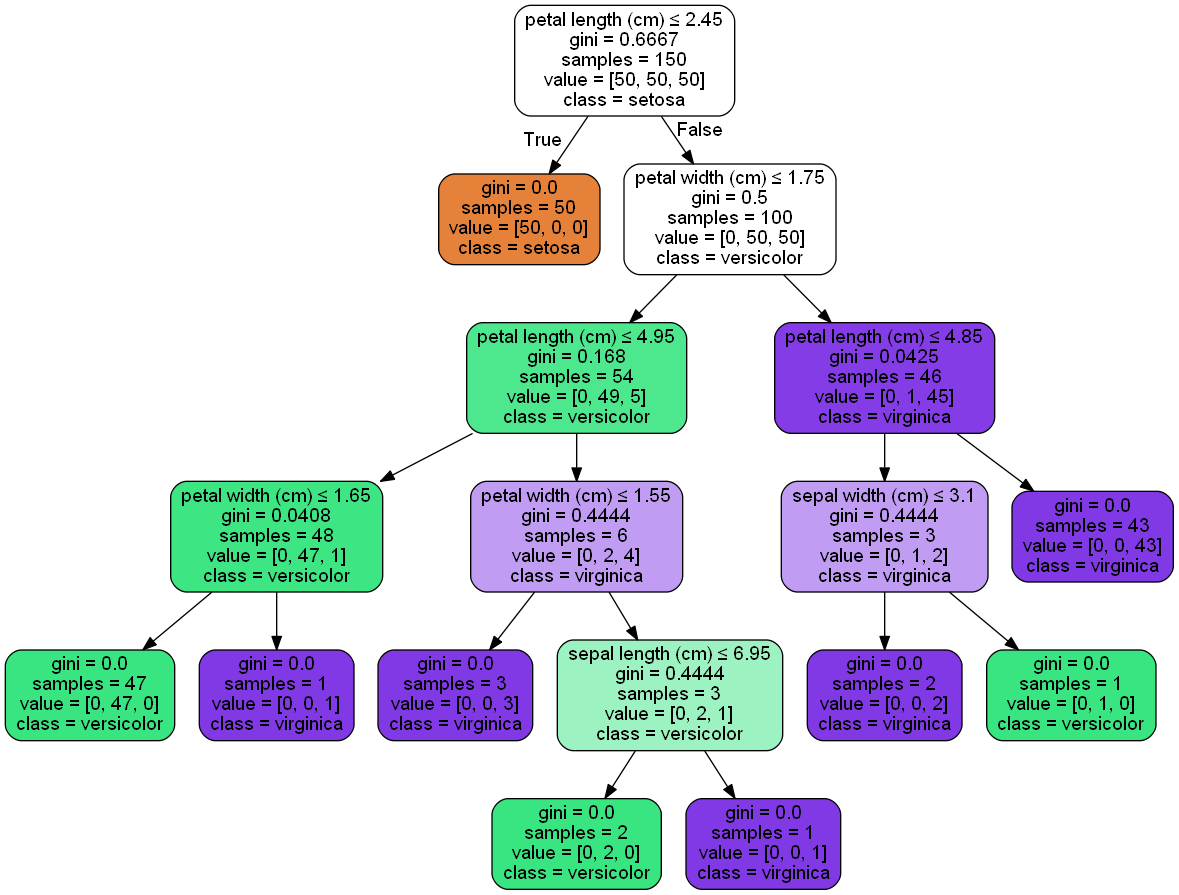

In [18]:
Image(graph.create_png())


Decision Tree Regression
A 1D regression with decision tree.
The :ref:`decision trees <tree>` is
used to fit a sine curve with addition noisy observation. As a result, it
learns local linear regressions approximating the sine curve.
We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.



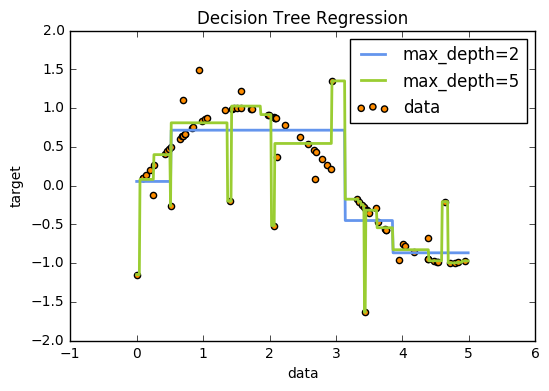

In [20]:
"""
===================================================================
Decision Tree Regression
===================================================================
A 1D regression with decision tree.
The :ref:`decision trees <tree>` is
used to fit a sine curve with addition noisy observation. As a result, it
learns local linear regressions approximating the sine curve.
We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.
"""
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [19]:
clf.predict(iris.data[:1,:])

array([0])

In [20]:
clf.predict_proba(iris.data[:1,:])

array([[ 1.,  0.,  0.]])


Plot the decision surface of a decision tree on the iris dataset
Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.
See :ref:`decision tree <tree>` for more information on the estimator.
For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.



C:\Users\korea\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\korea\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


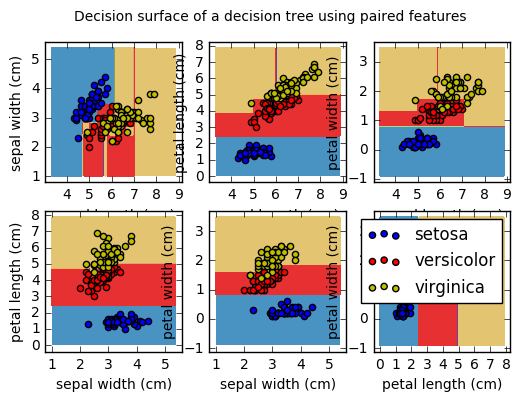

In [22]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================
Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.
See :ref:`decision tree <tree>` for more information on the estimator.
For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [21]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor() #regressor 사용
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])


Plot classification probability
Plot the classification probability for different classifiers. We use a 3
class dataset, and we classify it with a Support Vector classifier, L1
and L2 penalized logistic regression with either a One-Vs-Rest or multinomial
setting, and Gaussian process classification.
The logistic regression is not a multiclass classifier out of the box. As
a result it can identify only the first class.

classif_rate for L1 logistic : 79.333333 
classif_rate for L2 logistic (OvR) : 76.666667 
classif_rate for GPC : 82.666667 
classif_rate for L2 logistic (Multinomial) : 82.000000 
classif_rate for Linear SVC : 82.000000 


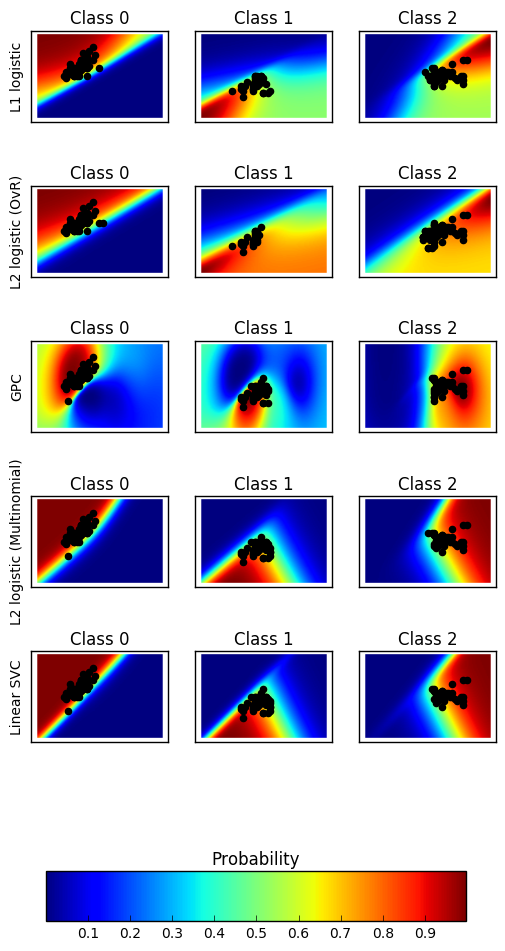

In [21]:
"""
===============================
Plot classification probability
===============================
Plot the classification probability for different classifiers. We use a 3
class dataset, and we classify it with a Support Vector classifier, L1
and L2 penalized logistic regression with either a One-Vs-Rest or multinomial
setting, and Gaussian process classification.
The logistic regression is not a multiclass classifier out of the box. As
a result it can identify only the first class.
"""
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 1.0
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0),
               'L2 logistic (Multinomial)': LogisticRegression(
                C=C, solver='lbfgs', multi_class='multinomial'),
               'GPC': GaussianProcessClassifier(kernel)
               }

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

In [11]:
import sys
sys.path

['',
 'C:\\Users\\korea\\Anaconda3\\python35.zip',
 'C:\\Users\\korea\\Anaconda3\\DLLs',
 'C:\\Users\\korea\\Anaconda3\\lib',
 'C:\\Users\\korea\\Anaconda3',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages\\Sphinx-1.4.6-py3.5.egg',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.5.egg',
 'C:\\Users\\korea\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\korea\\.ipython']